In [ ]:
!pip install nltk
!pip install pandas
!pip install matplotlib
!pip install -U gensim
!pip install jupyter
!pip install pyLDAvis
!pip install Unidecode

In [123]:
import pandas as pd
import numpy as np
import dateutil.parser
import nltk
import re
import codecs
import matplotlib.pyplot as plt
import io
import os.path
import re
import time
import seaborn as sns  
from datetime import datetime
from datetime import date
from datetime import timedelta, datetime
import seaborn as sns
import collections
from scipy.stats import itemfreq
from itertools import groupby

Se hace detección de outliers

In [2]:
df = pd.read_excel (r'C:\Users\w7\Desktop\proyecto integrador\dataset.xlsx')
df['date'] = df['date'].apply(dateutil.parser.parse)
df = df.rename(index=df['date'])

In [3]:
rating_count = df.groupby(['product', 'date']).count()[['rating']].reset_index()
products = rating_count['product'].unique()
dates = rating_count['date'].unique()

In [4]:
info =pd.DataFrame()
std2 = []
prom = []
for i in range(len(products)):
    prod = rating_count.loc[rating_count['product']==products[i]]
    prod = np.array(prod['rating'])
    std2 =  np.hstack((std2, np.std(prod)))
    prom =  np.hstack((prom, np.average(prod)))
info['product'] = products
info['std'] = std2
info['prom'] = prom

In [5]:
info

,product,std,prom
0,Animal Crossing: New Horizons,79.409340,39.957746
1,Call of Duty: Modern Warfare,7.371115,4.333333
2,Death Stranding,46.254998,13.808219
3,Fallout 4,19.431730,4.481735
4,Gears 5,26.752039,6.871560
5,Grand Theft Auto V,1.391997,1.345771
6,NieR: Automata,3.206711,1.891026
7,Pokemon Sword,74.309355,14.891892
8,Spore,7.607326,3.195238
9,The Elder Scrolls V: Skyrim,8.112723,2.536741


In [6]:
fecha = pd.DataFrame()
finaldf = pd.DataFrame()
finaldf['date'] = dates
zeros = pd.DataFrame(np.zeros((len(rating_count['date']), len(products))), columns= products )
finaldf = pd.concat([finaldf,zeros], axis =1 )

In [29]:
temp = pd.DataFrame()
beta = []
j = 11 # se debe, para fines del código, reemplazar la j por 0 hasta 11 y correr este código y la línea de abajo
for x in range(len(rating_count.loc[rating_count['product']==products[j]])):
    prod = np.array(rating_count.loc[rating_count['product']==products[j]]['rating'])
    std = info.loc[info['product']==products[j],'std']
    prom = info.loc[info['product']==products[j], 'prom']
    beta =  np.absolute(np.hstack((beta, (((prod)[x])-prom)/std)))
    temp['date'] = rating_count.loc[rating_count['product']==products[j]]['date']
temp[products[j]] = beta

In [30]:
finaldf.update(temp)

In [33]:
finaldf.head()

,date,Animal Crossing: New Horizons,Call of Duty: Modern Warfare,Death Stranding,Fallout 4,Gears 5,Grand Theft Auto V,NieR: Automata,Pokemon Sword,Spore,The Elder Scrolls V: Skyrim,Titan Souls,Warcraft III: Reforged
0,2020-03-20,0.642774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-21,0.403507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-22,0.139055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-23,0.390914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-24,6.347393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tempdict = {'date':[], products[0]:[]}
beta = []
for j in range(len(products)):
    for x in range(len(rating_count.loc[rating_count['product']==products[j]])):
        prod = rating_count.loc[rating_count['product']==products[j]]['rating']
        std = info.loc[info['product']==products[j],'std']
        prom = info.loc[info['product']==products[j], 'prom']
        tempdict['date'].append(rating_count.loc[rating_count['product']==products[j]]['date'][x])
        tempdict[products[0]].append(np.absolute(np.hstack((beta, (((prod)[x])-prom)/std))))   

In [ ]:
j = 0
tempdict = {'date':[], products[j]:[]}
for x in range(len(rating_count.loc[rating_count['product']==products[j]])):
    prod = rating_count.loc[rating_count['product']==products[j]].reset_index()['rating']
    std = info.loc[info['product']==products[j],'std']
    prom = info.loc[info['product']==products[j], 'prom']
    tempdict['date'].append(rating_count.loc[rating_count['product']==products[j]].reset_index()['date'][x])
    tempdict[products[j]].append(np.absolute(np.hstack((beta, (((prod)[x])-prom)/std))))
#     tempdict[products[j]].append((prod[x]-prom)/std)

In [ ]:
for i in range(len(products)+1):
    print(finaldf.iloc[:,i].max())

In [31]:
finalreviews = pd.DataFrame()
for i in range(len(products)):
    fechas_prueba = finaldf.loc[finaldf[products[i]]>=2]['date']
    finalreviews = pd.concat([finalreviews, df.loc[df['product']==products[i]].loc[fechas_prueba]], axis=0)
finalreviews

,product,name,date,rating,review,percentage,langreview
2020-03-24,Animal Crossing: New Horizons,\nNathanDetr0it\n,2020-03-24,4,"\n""One Dictator, Seven Slaves"" same-console mu...",0.636986,en
2020-03-24,Animal Crossing: New Horizons,\nAngelmamistan\n,2020-03-24,0,Having one island per console isn't even the w...,0.628571,en
2020-03-24,Animal Crossing: New Horizons,\nPeppermintsneez\n,2020-03-24,1,"As a secondary island member, it is hard to ra...",0.615385,en
2020-03-24,Animal Crossing: New Horizons,\nc_anthony\n,2020-03-24,1,Animal Crossing: New Horizons is a great solo ...,0.590909,en
2020-03-24,Animal Crossing: New Horizons,\nBaileywastaken\n,2020-03-24,0,\nNintendo made this game so that only one per...,0.586207,en
...,...,...,...,...,...,...,...
2020-01-31,Warcraft III: Reforged,\nWailrimouche\n,2020-01-31,0,"\nNo promises delivered, no campaign changes, ...",1.000000,en
2020-01-31,Warcraft III: Reforged,\nheyylisten\n,2020-01-31,0,\nBlizzard have completely and utterly lost th...,1.000000,en
2020-01-31,Warcraft III: Reforged,\nCheddarwilly\n,2020-01-31,0,\nIt's kind of impressive how bad they screwed...,1.000000,en
2020-01-31,Warcraft III: Reforged,\nMelounus\n,2020-01-31,0,No custom campaign :( no good conditions for m...,1.000000,en


In [32]:
df = finalreviews

Se hace analisis de texto

In [33]:
review = df['review'].dropna().reset_index()
review = review['review']
review

0       \n"One Dictator, Seven Slaves" same-console mu...
1       Having one island per console isn't even the w...
2       As a secondary island member, it is hard to ra...
3       Animal Crossing: New Horizons is a great solo ...
4       \nNintendo made this game so that only one per...
                              ...                        
7363    \nNo promises delivered, no campaign changes, ...
7364    \nBlizzard have completely and utterly lost th...
7365    \nIt's kind of impressive how bad they screwed...
7366    No custom campaign :( no good conditions for m...
7367    \nFeels more of a downgrade than an upgrade re...
Name: review, Length: 7368, dtype: object

In [34]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [35]:
for idx in range(len(review)):
    review[idx] = review[idx].lower()  # Convert to lowercase.
    review[idx] = tokenizer.tokenize(review[idx])  # Split into words.

In [36]:
from nltk.corpus import stopwords 
stop_words_nltk = set(stopwords.words('english'))

In [37]:
review = [[token for token in doc if not token.isnumeric()] for doc in review]
review = [[token for token in doc if len(token) > 1] for doc in review]
review = [[token for token in doc if token not in stop_words_nltk] for doc in review]
review = [[token for token in doc if token != "nan"] for doc in review]
review = [[token for token in doc if token != "game"] for doc in review]

In [38]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
review = [[lemmatizer.lemmatize(token) for token in doc] for doc in review]

In [39]:
import gensim
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(review, min_count=20)
for idx in range(len(review)):
    for token in bigram[review[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            review[idx].append(token)

In [40]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(review)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.9)

In [41]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in review]

In [42]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2498
Number of documents: 7368


In [43]:
from gensim.models.ldamulticore import LdaMulticore
# Set training parameters.
# amount = len(df['product'].unique())+1
amount = 2
num_topics = amount
chunksize = 2000
passes = 20
iterations = 20
eval_every = None  # Don't evaluate model perplexity, takes too much time.
workers = 70

t0 = time.time()

lda = LdaMulticore(corpus, num_topics=num_topics, id2word = dictionary, passes=passes, workers=workers)
print(time.time()-t0)

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.

50.71716928482056


In [44]:
top_topics = lda.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.6890.
[([(0.019049399, 'pokemon'),
   (0.013388933, 'game'),
   (0.011553468, 'like'),
   (0.008364337, 'new'),
   (0.0071862224, 'even'),
   (0.00665939, 'story'),
   (0.0063937865, 'graphic'),
   (0.006340538, 'one'),
   (0.0061729285, 'time'),
   (0.0060487306, 'good'),
   (0.0060223644, 'animation'),
   (0.00582607, 'pokémon'),
   (0.005443664, 'feel'),
   (0.0053620217, 'mod'),
   (0.0052569574, 'look'),
   (0.0052133463, 'make'),
   (0.0050859475, 'best'),
   (0.00502211, 'really'),
   (0.004814693, 'much'),
   (0.004534513, 'area')],
  -1.6637072217178934),
 ([(0.011766592, 'like'),
   (0.010136529, 'one'),
   (0.009351606, 'play'),
   (0.008758345, 'fallout'),
   (0.0075930483, 'get'),
   (0.0071670525, 'new'),
   (0.006493646, 'even'),
   (0.006243016, 'time'),
   (0.006232635, 'really'),
   (0.006068113, 'make'),
   (0.006042805, 'people'),
   (0.0059895352, 'island'),
   (0.005759691, 'good'),
   (0.0057567037, 'player'),
   (0.0057044877, 'game')

In [45]:
import pyLDAvis
from pyLDAvis import gensim

t0 = time.time()
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda, corpus, dictionary, sort_topics = False)
print(time.time()-t0)
vis

7.392852306365967


PreparedData(topic_coordinates=            x    y  topics  cluster       Freq
topic                                         
0      0.0651  0.0       1        1  61.864716
1     -0.0651  0.0       2        1  38.135292, topic_info=           Term         Freq        Total Category  logprob  loglift
345     pokemon  2478.000000  2478.000000  Default  30.0000  30.0000
1931    pokémon   760.000000   760.000000  Default  29.0000  29.0000
1574  animation   806.000000   806.000000  Default  28.0000  28.0000
44         game  2944.000000  2944.000000  Default  27.0000  27.0000
6        island  1266.000000  1266.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
82         also   536.931946  1205.323608   Topic2  -5.4896   0.1554
141       great   557.282837  1527.891113   Topic2  -5.4524  -0.0445
280         lot   516.355835  1078.362305   Topic2  -5.5286   0.2276
765         bad   521.354126  1379.561157   Topic2  -5.5190  -0.0091
45          get   513.054016  2114.614258   Topic2  -5.5351  -0.4522

[184 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
572       1  0.015772         3d
572       2  0.984173         3d
13        1  0.993917         ac
13        2  0.011424         ac
190       1  0.976060    account
...     ...       ...        ...
1344      2  0.998501  wild_area
382       1  0.671119      world
382       2  0.328585      world
170       1  0.694771      would
170       2  0.305345      would

[276 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [46]:
from pprint import pprint

In [47]:
pprint(lda.print_topics())

[(0,
  '0.012*"like" + 0.010*"one" + 0.009*"play" + 0.009*"fallout" + 0.008*"get" + '
  '0.007*"new" + 0.006*"even" + 0.006*"time" + 0.006*"really" + 0.006*"make"'),
 (1,
  '0.019*"pokemon" + 0.013*"game" + 0.012*"like" + 0.008*"new" + 0.007*"even" '
  '+ 0.007*"story" + 0.006*"graphic" + 0.006*"one" + 0.006*"time" + '
  '0.006*"good"')]


In [48]:
sent_topics_df = pd.DataFrame()
sent_topics_df

""


In [49]:
for i, row_list in enumerate(lda[corpus]):
    row = row_list[0] if lda.per_word_topics else row_list            
    # print(row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:  # => dominant topic
            wp = lda.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
        else:
            break
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

In [50]:
contents = pd.Series(review)
sent_topics_df['Tokenized_review'] = contents
 

In [ ]:
sent_topics_df.to_excel(r'C:\Users\w7\Desktop\proyecto integrador\topics2.xlsx')

In [51]:
df = pd.read_excel(r'C:\Users\w7\Desktop\proyecto integrador\topics2.xlsx')

Se testea la validez del modelo

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['Tokenized_review'], df['Dominant_Topic'], random_state = 0)

In [54]:
count_vect_nb = CountVectorizer()
X_train_counts = count_vect_nb.fit_transform(X_train)
tfidf_transformer_nb = TfidfTransformer()
X_train_tfidf = tfidf_transformer_nb.fit_transform(X_train_counts)
nb = MultinomialNB().fit(X_train_tfidf, y_train)
y_predecido = nb.predict(count_vect_nb.transform(X_test))

In [55]:
print(metrics.classification_report(y_test, y_predecido))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1029
           1       0.99      0.85      0.91       813

    accuracy                           0.93      1842
   macro avg       0.94      0.92      0.93      1842
weighted avg       0.94      0.93      0.93      1842



In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
tfidf_transformer_knn = TfidfTransformer()
count_vect_knn = CountVectorizer()
x_knn_tfidf = count_vect_knn.fit_transform(X_train)
knn = knn.fit(x_knn_tfidf, y_train)


In [58]:
y_pred_knn = knn.predict(count_vect_knn.transform(X_test))

In [59]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      1029
           1       0.83      0.58      0.68       813

    accuracy                           0.76      1842
   macro avg       0.78      0.74      0.75      1842
weighted avg       0.77      0.76      0.75      1842



In [60]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(random_state=0, max_depth=2)

In [61]:
tfidf_transformer_dt = TfidfTransformer()
count_vect_dt = CountVectorizer()
x_train_dt_tfidf = count_vect_dt.fit_transform(X_train)
x_dt_tfidf = tfidf_transformer_dt.fit_transform(x_train_dt_tfidf)
Dt = Dt.fit(x_train_dt_tfidf, y_train)

In [62]:
y_pred_dt = Dt.predict(count_vect_dt.transform(X_test))

In [63]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1029
           1       0.97      0.47      0.63       813

    accuracy                           0.76      1842
   macro avg       0.83      0.73      0.72      1842
weighted avg       0.82      0.76      0.74      1842



Vamos a cargar datos adicionales para comprobar la precisión del modelo

In [68]:
newdf = pd.read_excel (r'C:\Users\w7\Desktop\proyecto integrador\test set.xlsx')

In [69]:
newdf

,product,name,date,rating,review,validez
0,The Last of Us Part II,\nJusticier\n,"Jun 19, 2020",0,"\nbeginner's error, never put two stories of t...",negativa
1,The Last of Us Part II,\nJusticier\n,"Jun 19, 2020",0,"\nbeginner's error, never put two stories of t...",negativa
2,The Last of Us Part II,\nadnan786\n,"Jun 19, 2020",0,"\ngame play was amazing, graphics are amazing,...",negativa
3,The Last of Us Part II,\nJeb24965\n,"Jun 19, 2020",0,"\ngame play was amazing, graphics are amazing,...",negativa
4,The Last of Us Part II,\nqsxd0711\n,"Jun 19, 2020",0,"\nNaughty dog, I think you must see Clinton Ea...",negativa
...,...,...,...,...,...,...
516,The Last of Us Part II,\nLGBT_PLZ_DIE\n,"Jun 19, 2020",0,\nI'm not going to mention any **** I'll say t...,negativa
517,The Last of Us Part II,\nplayermartin286\n,"Jun 19, 2020",2,\nI don’t appreciate leftist propaganda in a v...,negativa
518,The Last of Us Part II,\nHerto1900\n,"Jun 19, 2020",0,"Such an a political game, an history without s...",negativa
519,The Last of Us Part II,\nVini2121\n,"Jun 19, 2020",1,\nHow does one get a sex change during an apoc...,negativa


In [242]:
newdf.replace(('positiva', 'negativa'), (1, 0), inplace=True)

In [243]:
newdf

,product,name,date,rating,review,validez
0,The Last of Us Part II,\nJusticier\n,"Jun 19, 2020",0,"\nbeginner's error, never put two stories of t...",0
1,The Last of Us Part II,\nJusticier\n,"Jun 19, 2020",0,"\nbeginner's error, never put two stories of t...",0
2,The Last of Us Part II,\nadnan786\n,"Jun 19, 2020",0,"\ngame play was amazing, graphics are amazing,...",0
3,The Last of Us Part II,\nJeb24965\n,"Jun 19, 2020",0,"\ngame play was amazing, graphics are amazing,...",0
4,The Last of Us Part II,\nqsxd0711\n,"Jun 19, 2020",0,"\nNaughty dog, I think you must see Clinton Ea...",0
...,...,...,...,...,...,...
516,The Last of Us Part II,\nLGBT_PLZ_DIE\n,"Jun 19, 2020",0,\nI'm not going to mention any **** I'll say t...,0
517,The Last of Us Part II,\nplayermartin286\n,"Jun 19, 2020",2,\nI don’t appreciate leftist propaganda in a v...,0
518,The Last of Us Part II,\nHerto1900\n,"Jun 19, 2020",0,"Such an a political game, an history without s...",0
519,The Last of Us Part II,\nVini2121\n,"Jun 19, 2020",1,\nHow does one get a sex change during an apoc...,0


In [244]:
x = newdf['review']
y = newdf['validez']

In [245]:
y_nb = nb.predict(count_vect_nb.transform(x))
print(metrics.classification_report(y, y_nb))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       426
           1       0.09      0.08      0.08        95

    accuracy                           0.67       521
   macro avg       0.44      0.44      0.44       521
weighted avg       0.67      0.67      0.67       521



In [246]:
y_knn = knn.predict(count_vect_knn.transform(x))
print(metrics.classification_report(y, y_knn))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       426
           1       0.19      0.24      0.21        95

    accuracy                           0.67       521
   macro avg       0.50      0.50      0.50       521
weighted avg       0.70      0.67      0.69       521



In [247]:
y_Dt = Dt.predict(count_vect_dt.transform(x))
print(metrics.classification_report(y, y_Dt))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       426
           1       0.00      0.00      0.00        95

    accuracy                           0.82       521
   macro avg       0.41      0.50      0.45       521
weighted avg       0.67      0.82      0.74       521



D:\Users\w7\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
df

,product,name,date,rating,review,percentage,langreview
2008-09-10,Spore,\nAlexandreD.\n,2008-09-10,5,\n You can create a lot and do a little. Gamep...,1.0,en
2008-09-18,Spore,\nJonathanH.\n,2008-09-18,5,"\n Some nice ideas, but it's over simplified a...",1.0,en
2008-09-18,Spore,\nJ\n,2008-09-18,6,The game has its ups and downs. Firstly this ...,1.0,en
2015-11-27,Spore,\nRavage\n,2015-11-27,7,\nThis is a great game with a great concept. A...,1.0,en
2019-05-09,Spore,\nPrincessRose\n,2019-05-09,6,"Quite a fun game for a while, I enjoy creating...",1.0,en
...,...,...,...,...,...,...,...
2020-04-19,Animal Crossing: New Horizons,\nDoubleDutch\n,2020-04-19,0,Thinking that given the fact that it is the ye...,0.0,en
2020-04-19,Animal Crossing: New Horizons,\nflickman42\n,2020-04-19,1,\nA game geared towards being family-friendly ...,0.0,en
2020-04-19,Animal Crossing: New Horizons,\nThe_Man_With_No\n,2020-04-19,6,"Only first player can create an island, it is ...",0.0,en
2020-04-19,Animal Crossing: New Horizons,\nWinthorp\n,2020-04-19,0,The choice to make the island binded to the SW...,0.0,en


In [176]:
newdf2 = newdf

In [177]:
newdf2['clasificacion'] = y_nb

In [182]:
newdf2 = newdf2.drop(columns = ['validez'])

In [184]:
newdf2['clasificacion'].replace((1, 0), ('positiva', 'negativa'), inplace=True)

In [197]:
newdf2.loc[newdf2['clasificacion'] == 'negativa']

,product,name,date,rating,review,clasificacion
0,The Last of Us Part II,\nJusticier\n,"Jun 19, 2020",0,"\nbeginner's error, never put two stories of t...",negativa
1,The Last of Us Part II,\nJusticier\n,"Jun 19, 2020",0,"\nbeginner's error, never put two stories of t...",negativa
2,The Last of Us Part II,\nadnan786\n,"Jun 19, 2020",0,"\ngame play was amazing, graphics are amazing,...",negativa
3,The Last of Us Part II,\nJeb24965\n,"Jun 19, 2020",0,"\ngame play was amazing, graphics are amazing,...",negativa
4,The Last of Us Part II,\nqsxd0711\n,"Jun 19, 2020",0,"\nNaughty dog, I think you must see Clinton Ea...",negativa
...,...,...,...,...,...,...
372,The Last of Us Part II,\nadriancgmask\n,"Jun 19, 2020",0,When I'm watching the last episode of game of ...,negativa
373,The Last of Us Part II,\nDanil_Karpoff\n,"Jun 19, 2020",0,Worst playstation 4 exclusive plot wise. Fans ...,negativa
375,The Last of Us Part II,\nxxP4L4D1Nxx\n,"Jun 19, 2020",4,Wow...just wow.\rDid you know Revenge is bad? ...,negativa
376,The Last of Us Part II,\nSleepOnTheFloor\n,"Jun 19, 2020",0,Y'aLl AcT LiKe YoU'vE hEaRd Of Us Or SoMeThInG...,negativa


Se hace una recalificación del producto

In [71]:
newdf2 = pd.read_excel (r'C:\Users\w7\tlou2final.xlsx')

In [74]:
x2 = newdf2['review']

In [75]:
y_knn2 = knn.predict(count_vect_knn.transform(x2))
y_Dt2 = Dt.predict(count_vect_dt.transform(x2))
y_nb2 = nb.predict(count_vect_nb.transform(x2))

In [77]:
newdf2['bombing'] = y_knn2

In [80]:
newdf2['bombing'].replace((1, 0), ('positiva', 'negativa'), inplace=True)

In [95]:
newdf2.loc[newdf2['bombing'] == 'positiva']['rating'].mean()

3.9914353219137624

In [84]:
rating2 = pd.read_excel (r'C:\Users\w7\tlou2final.xlsx')

In [88]:
fecha = np.array(rating2['date'])
calif = np.array(rating2['rating'])

In [89]:
flatrating=0
AA, BB = np.unique(fecha, return_counts=True)
for i in range(0, len(fecha)):
    flatrating=flatrating + float(calif[i])*(1/((fecha==fecha[i]).sum()))*(1/len(BB))
print(flatrating) 

4.42923749367673
8


In [135]:
datas = pd.read_excel (r'C:\Users\w7\Desktop\proyecto integrador\dataset.xlsx')
datas['date'] = datas['date'].apply(dateutil.parser.parse)

In [136]:
datas = test.loc[test['product']=="Call of Duty: Modern Warfare"]

In [137]:
fecha = np.array(datas['date'])
calif = np.array(datas['rating'])

In [138]:
flatrating=0
AA, BB = np.unique(fecha, return_counts=True)
for i in range(0, len(fecha)):
    flatrating=flatrating + float(calif[i])*(1/((fecha==fecha[i]).sum()))*(1/len(BB))
print(flatrating) 

4.3529716849219176


In [142]:
A, B = np.unique(datas['date'], return_counts=True)

In [144]:
normquotienttemp = sum(B)/len(B)
normquotient = normquotienttemp*normquotienttemp*len(B)

 

index1 = np.dot(B,B)/normquotient
print(index1)

3.893491124260356


In [146]:
index2 = float(np.var(datas[['rating']]))
print(index2)

17.630906886916517


In [150]:
ind3 = (index1/5) + (index2/20)

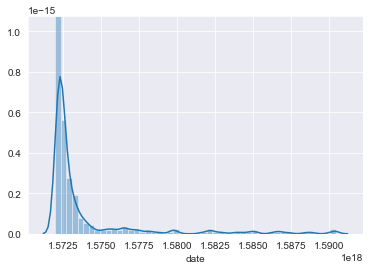

In [153]:
dataspor4
sns.set_style('darkgrid')
sns.distplot(datas['date'])